# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

sinasc = pd.read_csv('/content/SINASC_RO_2019.csv')

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

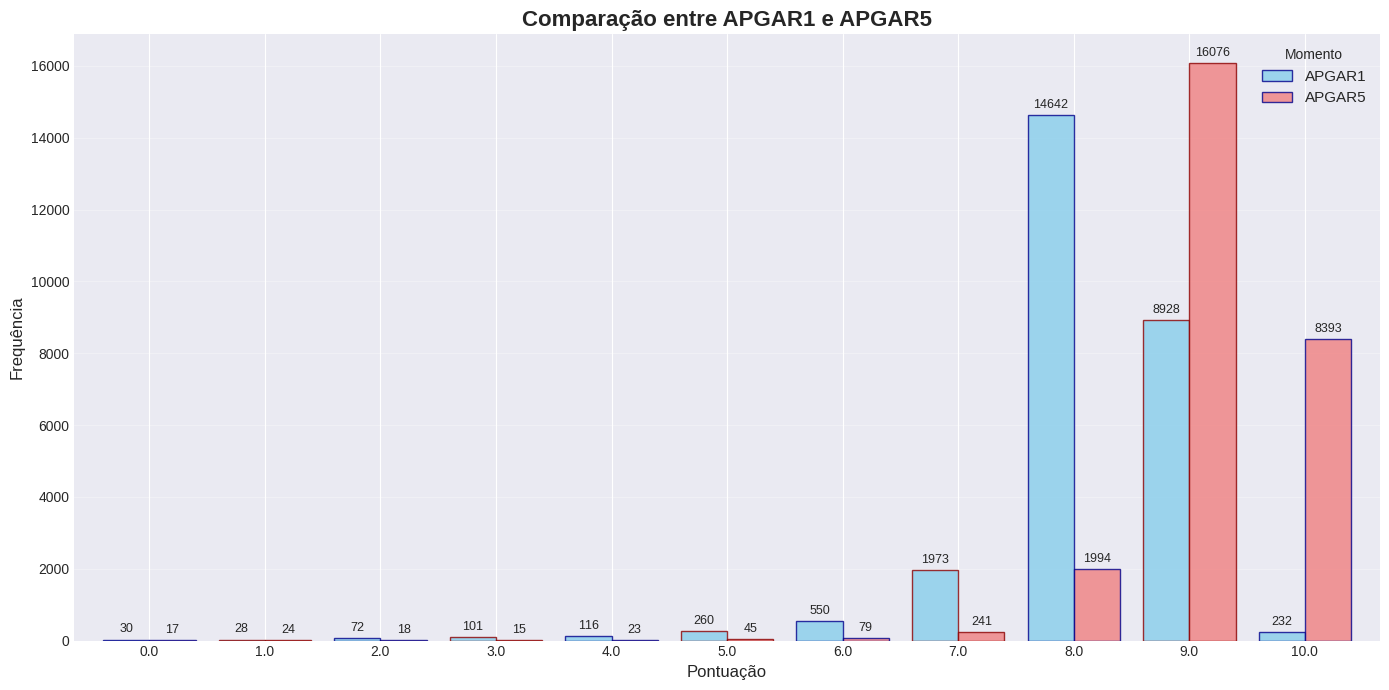

In [3]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

apgar1_counts = sinasc['APGAR1'].value_counts().sort_index()
apgar5_counts = sinasc['APGAR5'].value_counts().sort_index()

df_comparacao = pd.DataFrame({'APGAR1': apgar1_counts, 'APGAR5': apgar5_counts}).fillna(0)

ax = df_comparacao.plot(kind='bar', figsize=(14, 7), color=['skyblue', 'lightcoral'], edgecolor=['darkblue', 'darkred'], width=0.8, alpha=0.8)

plt.title('Comparação entre APGAR1 e APGAR5', fontsize=16, fontweight='bold')
plt.xlabel('Pontuação', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Momento', fontsize=11)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=9)

plt.tight_layout()
plt.show()


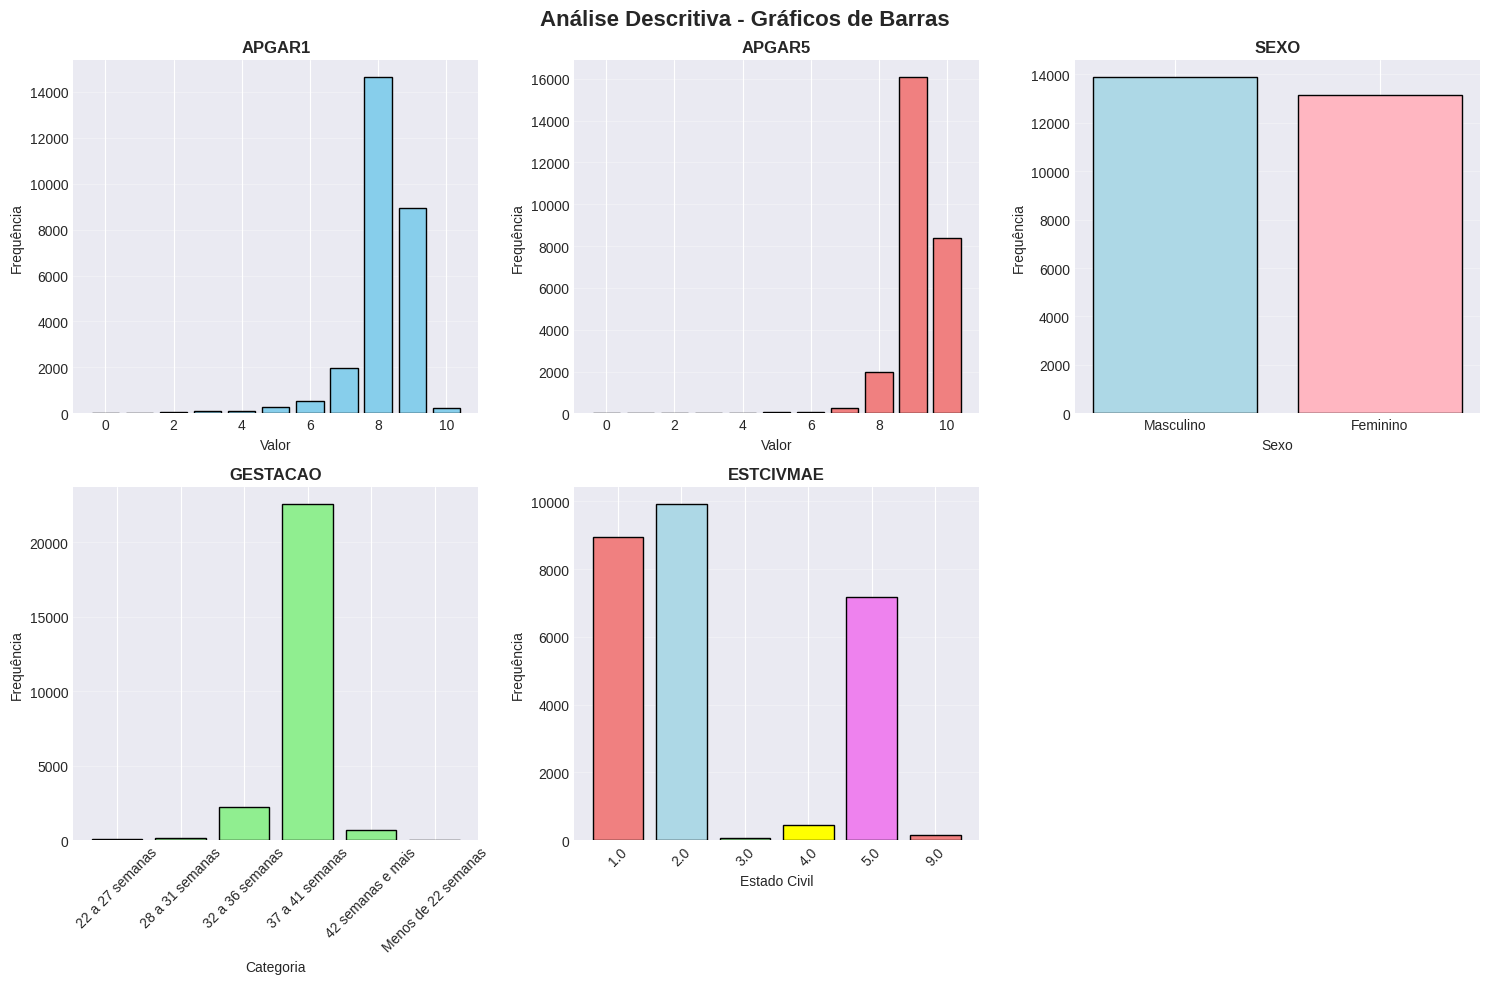

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Análise Descritiva - Gráficos de Barras', fontsize=16, fontweight='bold')

# 1. APGAR1
contagem1 = sinasc['APGAR1'].value_counts().sort_index()
axes[0, 0].bar(contagem1.index, contagem1.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('APGAR1', fontweight='bold')
axes[0, 0].set_xlabel('Valor')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. APGAR5
contagem2 = sinasc['APGAR5'].value_counts().sort_index()
axes[0, 1].bar(contagem2.index, contagem2.values, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('APGAR5', fontweight='bold')
axes[0, 1].set_xlabel('Valor')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. SEXO
contagem3 = sinasc['SEXO'].value_counts()
colors3 = ['lightblue', 'lightpink'] if len(contagem3) == 2 else ['lightblue']
axes[0, 2].bar(contagem3.index.astype(str), contagem3.values, color=colors3, edgecolor='black')
axes[0, 2].set_title('SEXO', fontweight='bold')
axes[0, 2].set_xlabel('Sexo')
axes[0, 2].set_ylabel('Frequência')
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. GESTACAO
contagem4 = sinasc['GESTACAO'].value_counts().sort_index()
axes[1, 0].bar(range(len(contagem4)), contagem4.values, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('GESTACAO', fontweight='bold')
axes[1, 0].set_xlabel('Categoria')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].set_xticks(range(len(contagem4)))
axes[1, 0].set_xticklabels(contagem4.index.astype(str), rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. ESTCIVMAE
contagem5 = sinasc['ESTCIVMAE'].value_counts().sort_index()
colors5 = ['lightcoral', 'lightblue', 'lightgreen', 'yellow', 'violet'][:len(contagem5)]
axes[1, 1].bar(range(len(contagem5)), contagem5.values, color=colors5, edgecolor='black')
axes[1, 1].set_title('ESTCIVMAE', fontweight='bold')
axes[1, 1].set_xlabel('Estado Civil')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_xticks(range(len(contagem5)))
axes[1, 1].set_xticklabels(contagem5.index.astype(str), rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

# 6. Remover o subplot vazio
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

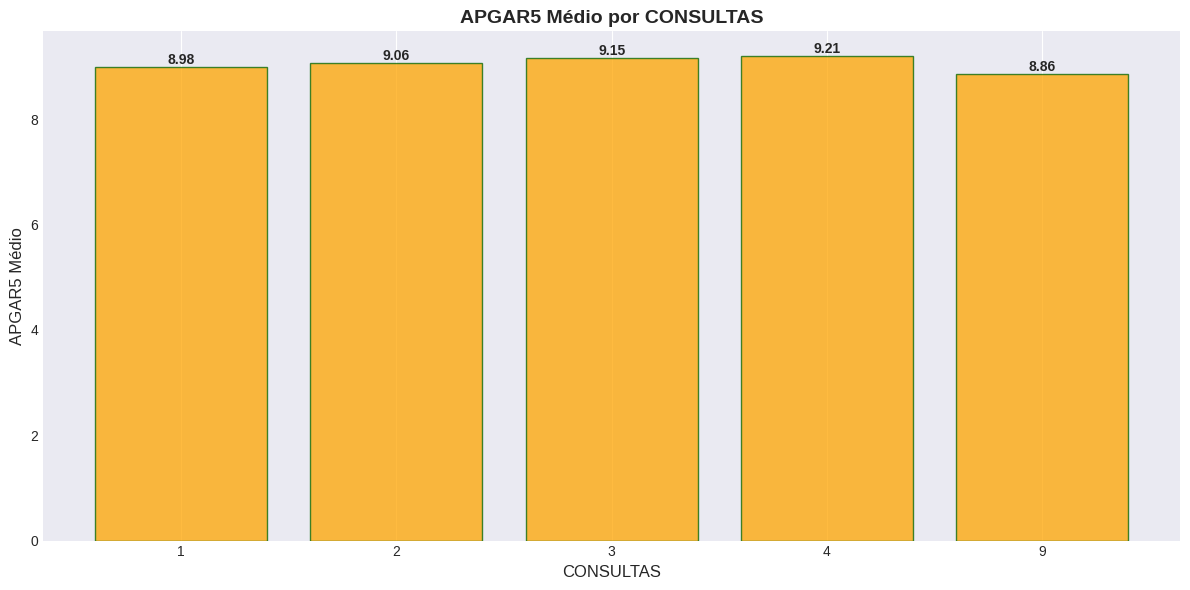

In [19]:
apgar_por_consulta = sinasc.groupby('CONSULTAS')['APGAR5'].mean().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(apgar_por_consulta.index.astype(str), apgar_por_consulta.values, color='orange', alpha=0.75, edgecolor='darkgreen')
plt.title('APGAR5 Médio por CONSULTAS', fontsize=14, fontweight='bold')
plt.xlabel('CONSULTAS', fontsize=12)
plt.ylabel('APGAR5 Médio', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0)

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

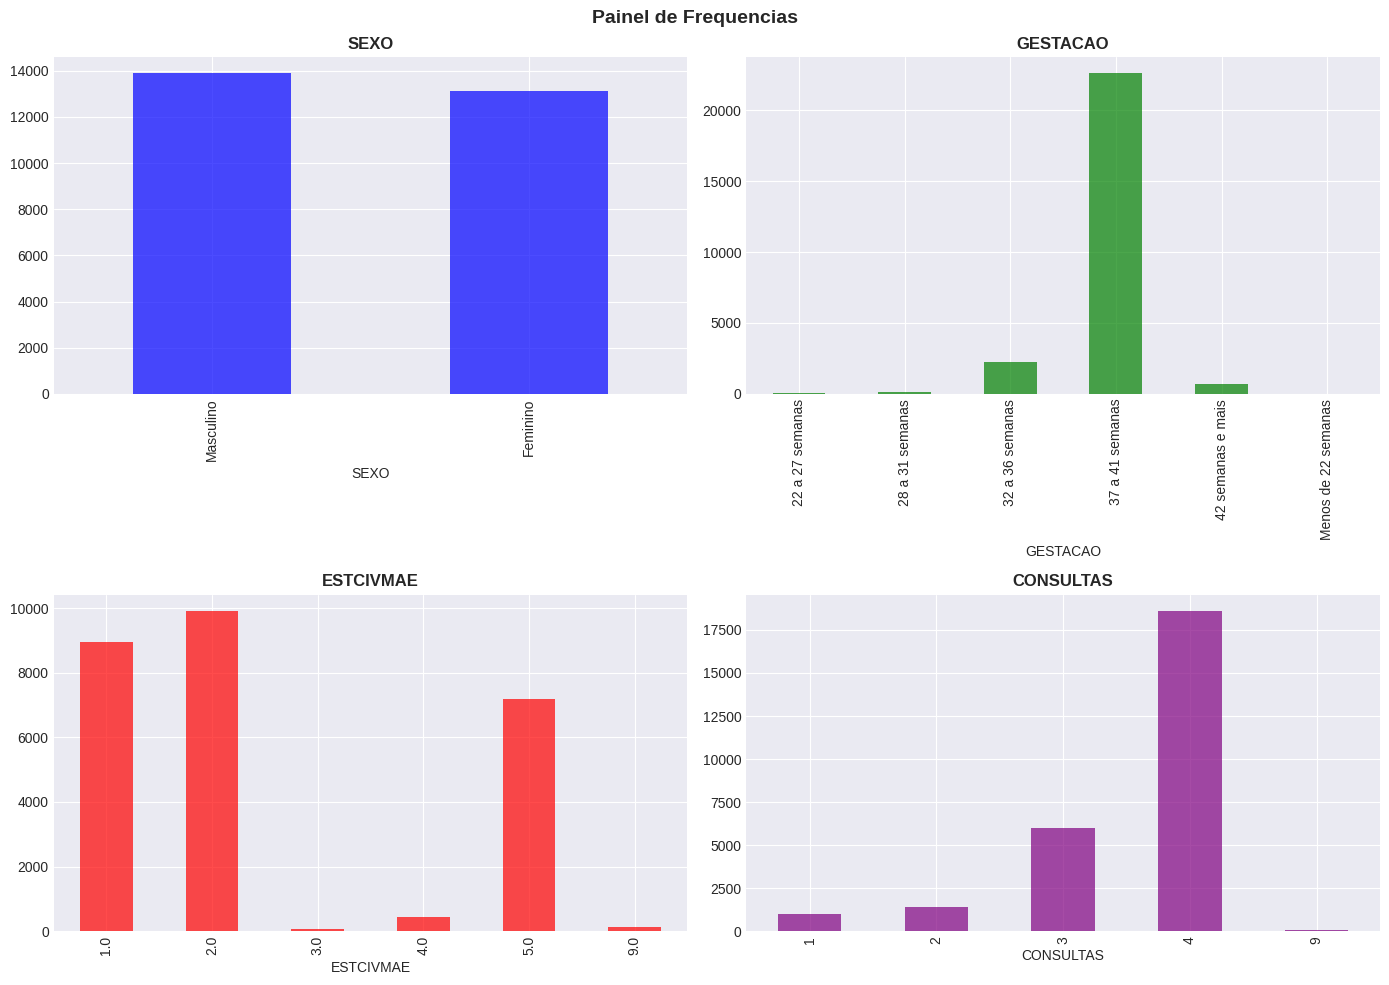

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sinasc['SEXO'].value_counts().plot(kind='bar', ax=axes[0,0], color='blue', alpha=0.7)
axes[0,0].set_title('SEXO', fontweight='bold')

sinasc['GESTACAO'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1], color='green', alpha=0.7)
axes[0,1].set_title('GESTACAO', fontweight='bold')

sinasc['ESTCIVMAE'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0], color='red', alpha=0.7)
axes[1,0].set_title('ESTCIVMAE', fontweight='bold')

sinasc['CONSULTAS'].value_counts().sort_index().plot(kind='bar', ax=axes[1,1], color='purple', alpha=0.7)
axes[1,1].set_title('CONSULTAS', fontweight='bold')

plt.suptitle('Painel de Frequencias', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

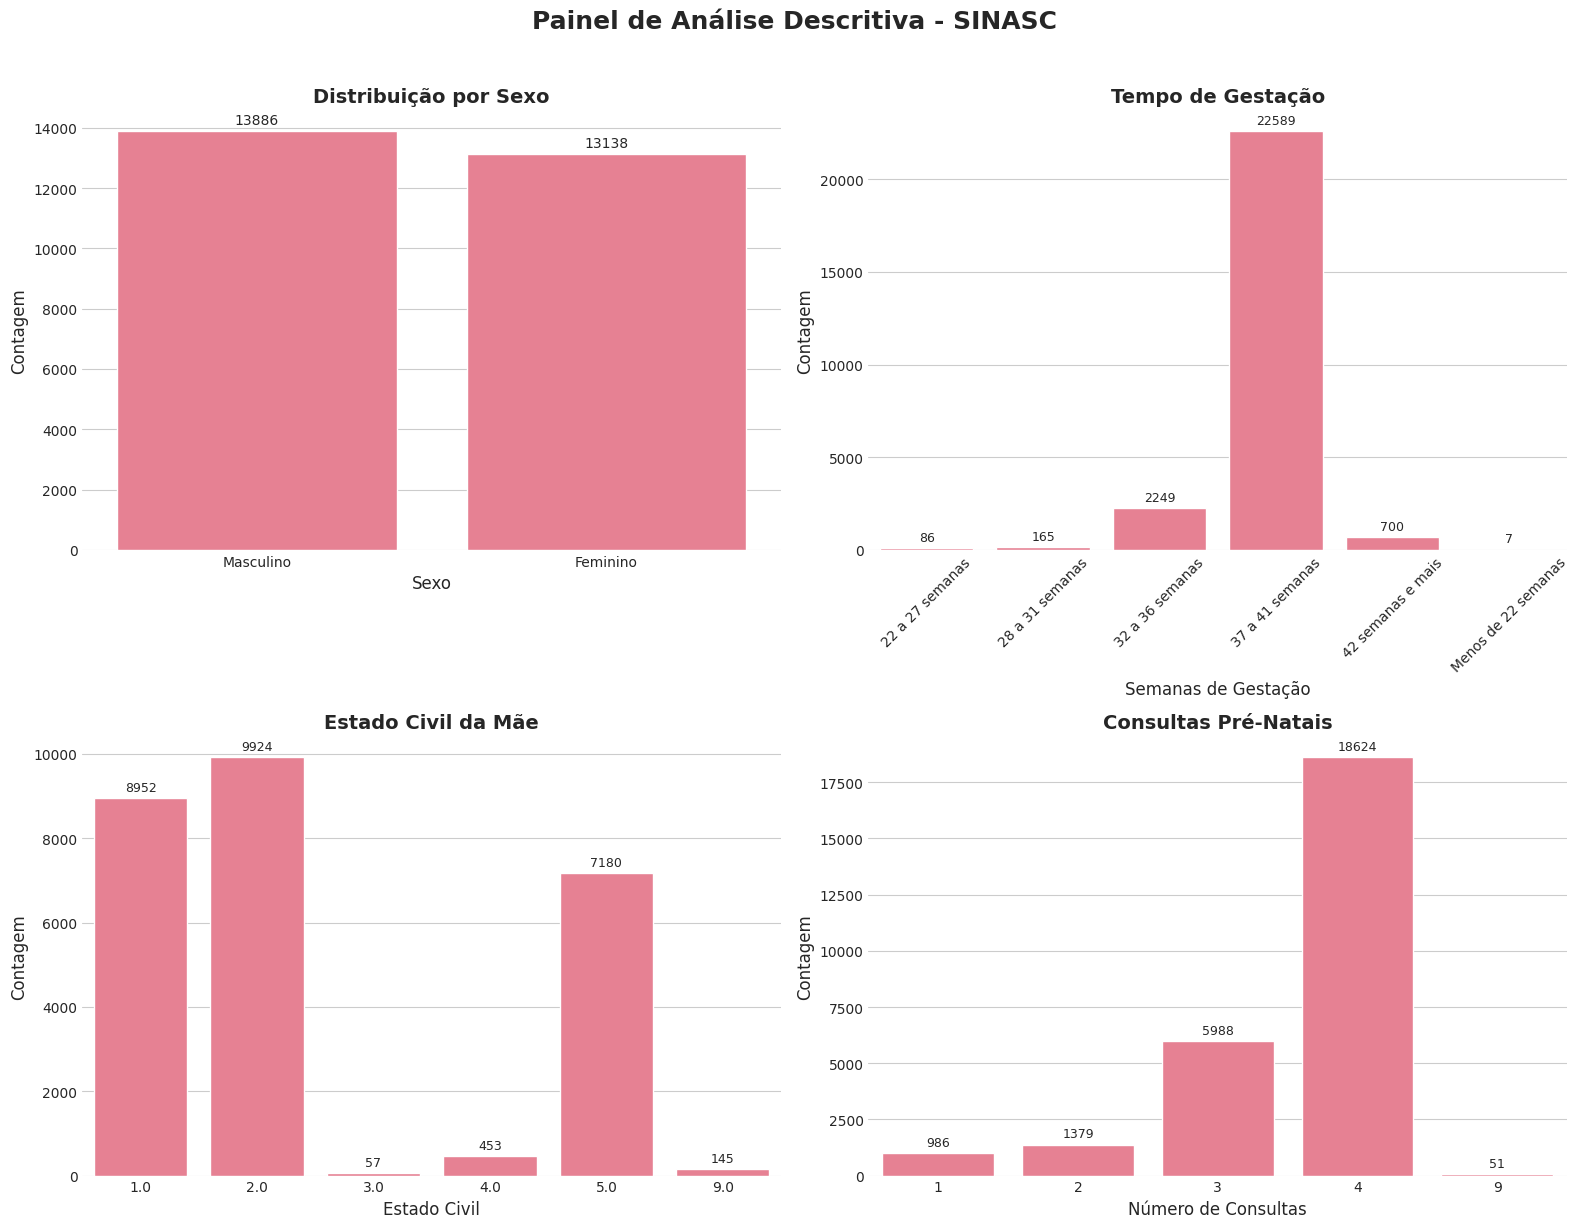

In [25]:
import seaborn as sns

# Configurar estilo seaborn
sns.set_style("whitegrid")
sns.set_palette("husl")

# Criar figura
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Painel de Análise Descritiva - SINASC',
             fontsize=18, fontweight='bold', y=1.02)

# 1. Gráfico SEXO com seaborn
ax1 = axes[0, 0]
sns.countplot(data=sinasc, x='SEXO', ax=ax1,
              order=sinasc['SEXO'].value_counts().index)
ax1.set_title('Distribuição por Sexo', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sexo', fontsize=12)
ax1.set_ylabel('Contagem', fontsize=12)

# Adicionar contagens
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', padding=3, fontsize=10)

# 2. Gráfico GESTACAO com seaborn
ax2 = axes[0, 1]
sns.countplot(data=sinasc, x='GESTACAO', ax=ax2,
              order=sinasc['GESTACAO'].value_counts().sort_index().index)
ax2.set_title('Tempo de Gestação', fontsize=14, fontweight='bold')
ax2.set_xlabel('Semanas de Gestação', fontsize=12)
ax2.set_ylabel('Contagem', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', padding=3, fontsize=9)

# 3. Gráfico ESTCIVMAE com seaborn
ax3 = axes[1, 0]
sns.countplot(data=sinasc, x='ESTCIVMAE', ax=ax3,
              order=sinasc['ESTCIVMAE'].value_counts().sort_index().index)
ax3.set_title('Estado Civil da Mãe', fontsize=14, fontweight='bold')
ax3.set_xlabel('Estado Civil', fontsize=12)
ax3.set_ylabel('Contagem', fontsize=12)
ax3.tick_params(axis='x', rotation=0)

for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', padding=3, fontsize=9)

# 4. Gráfico CONSULTAS com seaborn
ax4 = axes[1, 1]
# Ordenar por valor numérico
order_consultas = sorted(sinasc['CONSULTAS'].dropna().unique())
sns.countplot(data=sinasc, x='CONSULTAS', ax=ax4, order=order_consultas)
ax4.set_title('Consultas Pré-Natais', fontsize=14, fontweight='bold')
ax4.set_xlabel('Número de Consultas', fontsize=12)
ax4.set_ylabel('Contagem', fontsize=12)

for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', padding=3, fontsize=9)

plt.tight_layout()
plt.show()